# Matching and Balance Measures

This simple example demonstrates how to use the R MatchIt and Cobalt packages from within python.  This follows the example described at: https://github.com/cran/cobalt.

The ability to assess balance on covariate distributions is helpful when using propensity score matching to estimate causal effects of treatments.

For an introduction, see: https://ngreifer.github.io/cobalt/articles/cobalt.html

Quoting from the above link:

> "In addition to simply achieving balance, researchers must also report balance to convince readers that their analysis was performed adequately and that their causal conclusions are valid (Thoemmes and Kim 2011)." 

In [12]:
import rpy2.ipython

%reload_ext rpy2.ipython

# import rpy2's package module
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr, data
from rpy2.robjects import Formula

cobalt = rpackages.importr('cobalt')
matchit = rpackages.importr('MatchIt')

#data("lalonde", package = "cobalt")
lalonde = data(cobalt).fetch('lalonde')['lalonde']

formula = Formula('treat ~ age + educ + race + married + nodegree + re74 + re75')

mout = matchit.matchit(formula = formula, data=lalonde)

#Checking balance before and after matching:
bt = cobalt.bal_tab(mout, un = True) #, thresholds = c(m = .1),)
print(bt)

Balance Measures
                Type Diff.Un Diff.Adj
distance    Distance  1.7941   0.9739
age          Contin. -0.3094   0.0718
educ         Contin.  0.0550  -0.1290
race_black    Binary  0.6404   0.3730
race_hispan   Binary -0.0827  -0.1568
race_white    Binary -0.5577  -0.2162
married       Binary -0.3236  -0.0216
nodegree      Binary  0.1114   0.0703
re74         Contin. -0.7211  -0.0505
re75         Contin. -0.2903  -0.0257

Sample sizes
          Control Treated
All           429     185
Matched       185     185
Unmatched     244       0



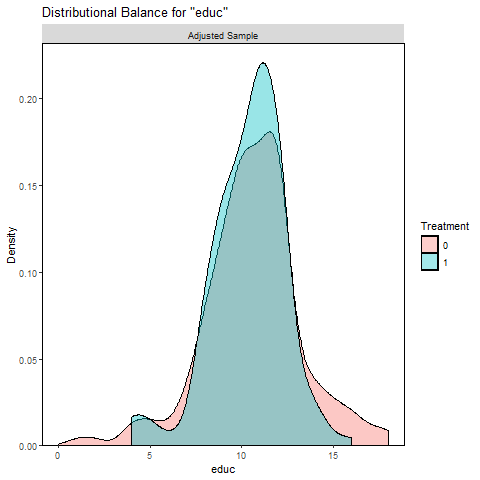

In [13]:
%%R -i mout
library("ggplot2", "cobalt", "MatchIt")
bal.plot(mout, var.name="educ")


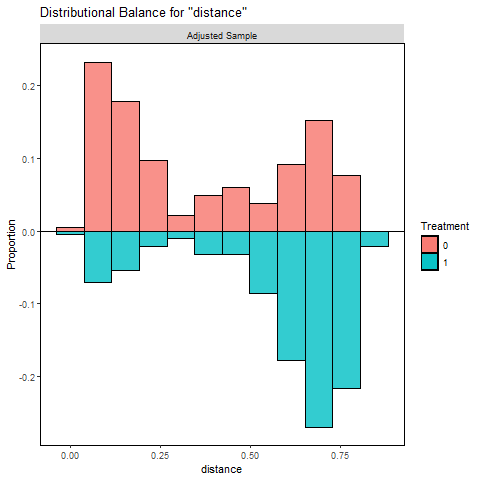

In [14]:
%%R
bal.plot(mout, var.name = "distance", 
    mirror = TRUE, type = "histogram")

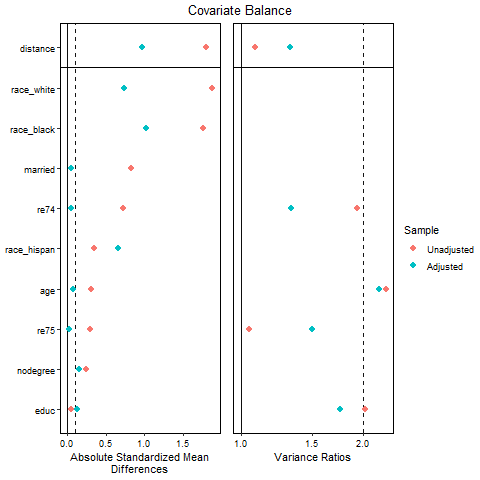

In [15]:
%%R
#Generating a Love plot to report balance:
love.plot(mout, stats = c("mean.diffs", "variance.ratios"),
          thresholds = c(m = .1, v = 2), abs = TRUE, 
          binary = "std",
          var.order = "unadjusted")